<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_CommunityDescription_Seaside.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaside Testbed - Initial Interdependent Community Description

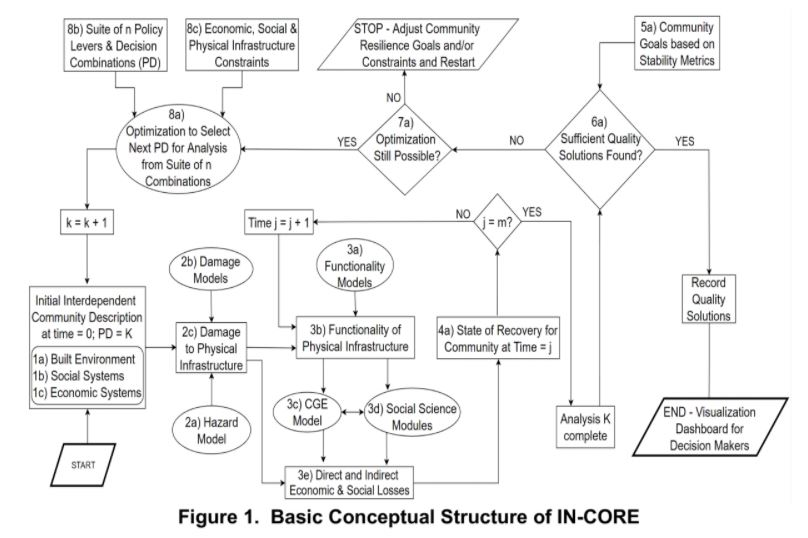

# Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdepent community description at time 0 and with policy levers and decision combinations set to K (baseline case). The community description includes three parts - the built enviroment, social systems, and economic systems. This notebook helps explore the data currently available in IN-CORE for the Seaside Testbed.

Seaside, OR is a community located on the Pacific Ocean in Northwest Oregon. The city has a high earthquake and tsunami risks.

In [1]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

In [2]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.3.1
numpy version:  1.21.1


In [3]:
# Check working directory - good practice for relative path access
os.getcwd()

'G:\\Shared drives\\HRRC_IN-CORE\\Tasks\\P4.9 Testebeds\\github_com\\npr99\\IN-CORE_notebooks'

In [5]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Connection successful to IN-CORE services. pyIncore version detected: 0.9.6


In [6]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built enviroment: Building Inventory

In [7]:
bldg_inv_id = "613ba5ef5d3b1d6461e8c415"
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\613ba5ef5d3b1d6461e8c415\seaside_bldg\seaside_bldg.shp


In [8]:
bldg_inv_gdf = gpd.read_file(filename)
bldg_inv_gdf.crs = {'init': 'epsg:4326'}
bldg_inv_gdf.head()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210802\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,parid,parid_card,bldg_id,struct_typ,str_prob,year_built,no_stories,a_stories,b_stories,bsmt_type,...,guid,FID_NEW,origin,stat_class,rmv_improv,rmv_land,elev,period,strctid,geometry
0,None,None,None,W1,None,1968,1,None,None,None,...,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,5783,1,193,0.0,0.0,-1.037119,0.35,41007020933038031S,POINT (-123.90900 46.01433)
1,None,None,None,W1,None,1992,1,None,None,None,...,65d6e370-c05b-4b2f-bd17-d914d1d056c7,5782,1,193,0.0,0.0,-14.826966,0.35,41007022416079053S,POINT (-123.90585 45.99795)
2,None,None,None,W1,None,1974,1,None,None,None,...,dad76485-9694-409e-ac7f-c64c7bd5c32c,5781,1,191,0.0,0.0,-1.037119,0.35,41007020933038014S,POINT (-123.90900 46.01433)
3,None,None,None,W1,None,1984,1,None,None,None,...,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,5780,1,193,0.0,0.0,-1.037119,0.35,41007020933038018S,POINT (-123.90900 46.01433)
4,None,None,None,W1,None,1964,1,None,None,None,...,929f1040-6224-409d-b4e3-58946daf3b91,5779,1,190,0.0,0.0,-1.729172,0.35,41007022789002002S,POINT (-123.91183 45.99747)


In [9]:
bldg_inv_gdf.columns

Index(['parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'FID_NEW', 'origin',
       'stat_class', 'rmv_improv', 'rmv_land', 'elev', 'period', 'strctid',
       'geometry'],
      dtype='object')

In [10]:
bldg_inv_gdf[['guid','strctid','struct_typ','struct_typ','year_built','occ_type']].head()

,guid,strctid,struct_typ,struct_typ,year_built,occ_type
0,fba4c73f-9b1b-4942-b7fb-bc276a4e0a4e,41007020933038031S,W1,W1,1968,None
1,65d6e370-c05b-4b2f-bd17-d914d1d056c7,41007022416079053S,W1,W1,1992,None
2,dad76485-9694-409e-ac7f-c64c7bd5c32c,41007020933038014S,W1,W1,1974,None
3,6f57cfb6-d244-40d5-96f5-03aeddd5e30a,41007020933038018S,W1,W1,1984,None
4,929f1040-6224-409d-b4e3-58946daf3b91,41007022789002002S,W1,W1,1964,None


In [11]:
bldg_inv_gdf['strctid'].describe()

count                   4679
unique                  4679
top       41007020933038031S
freq                       1
Name: strctid, dtype: object

In [12]:
bldg_inv_gdf[['guid','strctid','struct_typ','year_built','occ_type']].groupby('struct_typ').count()

,guid,strctid,year_built,occ_type
struct_typ,,,,
RC,1504,1504,1504,0
W1,2444,2444,2444,0
W2,731,731,731,0


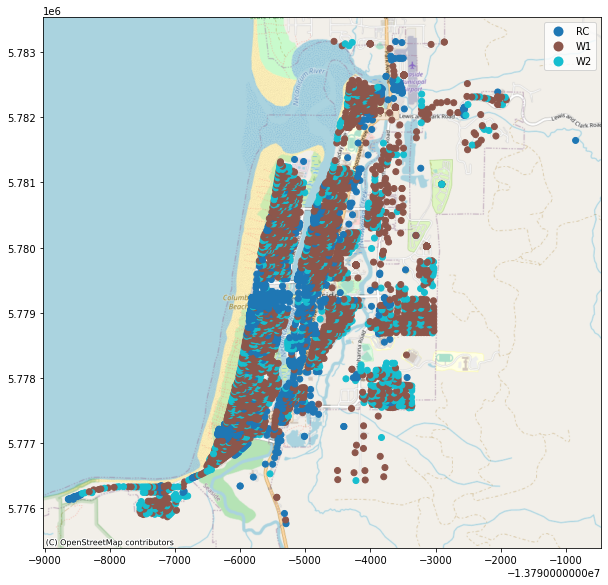

In [13]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='struct_typ')
map

## 1b) Social Systems: Housing Unit Inventory

The housing unit inventory includes characteristics for individual households and housing units that can be linked to residential buildings. 
For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. doi.org/10.1080/23789689.2019.1681821


In [15]:
# Seaside Housing Unit Inventory
housing_unit_inv_id = "5d543087b9219c0689b98234"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\5d543087b9219c0689b98234\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_HUinventory\IN-CORE_1bv6_SetupSeaside_FourInventories_2019-08-02_HUinventory.csv


In [16]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,blockid,blockidstr,huid,livetype,numprec,ownershp,race,hispan,vacancy,gqtype,bgid
0,410079501001001,B410079501001001,B410079501001001H001,H,2,1.0,1.0,0.0,0,0,410079501001
1,410079501001001,B410079501001001,B410079501001001H002,H,2,2.0,1.0,0.0,0,0,410079501001
2,410079501001001,B410079501001001,B410079501001001H003,H,1,1.0,1.0,0.0,0,0,410079501001
3,410079501001003,B410079501001003,B410079501001003H001,H,4,2.0,4.0,0.0,0,0,410079501001
4,410079501001003,B410079501001003,B410079501001003H002,H,1,2.0,1.0,0.0,0,0,410079501001


In [17]:
housing_unit_inv_df.columns

Index(['blockid', 'blockidstr', 'huid', 'livetype', 'numprec', 'ownershp',
       'race', 'hispan', 'vacancy', 'gqtype', 'bgid'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

### Race and Ethnicity
The housing unit inventory includes variables for race and ethnicity.

In [26]:
## Functions to add to pyincore-viz
def add_race_ethnicity_to_hua_df(df):

    df['Race Ethnicity'] = "0 Vacant HU No Race Ethnicity Data"
    df['Race Ethnicity'].notes = "Identify Race and Ethnicity Housing Unit Characteristics."

    df.loc[(df['race'] == 1) & (df['hispan'] == 0),'Race Ethnicity'] = "1 White alone, Not Hispanic"
    df.loc[(df['race'] == 2) & (df['hispan'] == 0),'Race Ethnicity'] = "2 Black alone, Not Hispanic"
    df.loc[(df['race'] == 3) & (df['hispan'] == 0),'Race Ethnicity'] = "3 American Indian and Alaska Native alone, Not Hispanic"
    df.loc[(df['race'] == 4) & (df['hispan'] == 0),'Race Ethnicity'] = "4 Asian alone, Not Hispanic"
    df.loc[(df['race'].isin([5,6,7])) & (df['hispan'] == 0),'Race Ethnicity'] = "5 Other Race, Not Hispanic"
    df.loc[(df['hispan'] == 1),'Race Ethnicity'] = "6 Any Race, Hispanic"
    df.loc[(df['gqtype'] >= 1),'Race Ethnicity'] = "7 Group Quarters no Race Ethnicity Data"
    # Set Race Ethnicity to missing if structure is vacant - makes tables look nicer
    df.loc[(df['Race Ethnicity'] == "0 Vacant HU No Race Ethnicity Data"),'Race Ethnicity'] = np.nan

    return df

def add_vacancy_to_hua_df(df):

    df['Vacancy Type'] = "0 Occupied Housing Unit"
    df['Vacancy Type'].notes = "Identify Vacancy Type Housing Unit Characteristics."

    df.loc[(df['vacancy'] == 1),'Vacancy Type'] = "1 For Rent"
    df.loc[(df['vacancy'] == 2),'Vacancy Type'] = "2 Rented, not occupied"
    df.loc[(df['vacancy'] == 3),'Vacancy Type'] = "3 For sale only"
    df.loc[(df['vacancy'] == 4),'Vacancy Type'] = "4 Sold, not occupied"
    df.loc[(df['vacancy'] == 5),'Vacancy Type'] = "5 For seasonal, recreational, or occasional use"
    df.loc[(df['vacancy'] == 6),'Vacancy Type'] = "6 For migrant workers"
    df.loc[(df['vacancy'] == 7),'Vacancy Type'] = "7 Other vacant"
    # Set variable to missing if structure is occupied - makes tables look nicer
    df.loc[(df['Vacancy Type'] == "0 Occupied Housing Unit"),'Vacancy Type'] = np.nan

    return df

def add_tenure_to_hua_df(df):

    df['Tenure Status'] = "0 No Tenure Status"
    df['Tenure Status'].notes = "Identify Renter and Owner Occupied Housing Unit Characteristics."

    df.loc[(df['ownershp'] == 1),'Tenure Status'] = "1 Owner Occupied"
    df.loc[(df['ownershp'] == 2),'Tenure Status'] = "2 Renter Occupied"
    # Set Tenure Status to missing if structure is vacant - makes tables look nicer
    df.loc[(df['Tenure Status'] == "0 No Tenure Status"),'Tenure Status'] = np.nan

    return df


def add_colpercent(df, sourcevar, formatedvar):
    df['%'] = (df[sourcevar] / (df[sourcevar].sum()/2)* 100)
    df['(%)'] = df.agg('({0[%]:.1f}%)'.format,axis=1)
    df['value'] = df[sourcevar]
    df['format value'] =  df.agg('{0[value]:,.0f}'.format, axis=1)
    df[formatedvar]= df['format value'] + '\t '+ df['(%)']

    df = df.drop(columns=[sourcevar,'%','(%)','value','format value'])

    return df


def pop_results_table(df, 
                      who = "Total Houseohlds", 
                      what= "by Race, Ethncity, and Tenure Status",
                      when = "2010", 
                      where = "",
                      row_index = 'Race Ethnicity',
                      col_index = 'Tenure Status',
                      row_percent = ''):
    
    df = add_race_ethnicity_to_hua_df(df)
    df = add_tenure_to_hua_df(df)
    df = add_vacancy_to_hua_df(df)
    
    if who == "Total Houseohlds":
        variable = 'numprec'
        function = 'count'
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
    elif who == "Total Population":
        variable = 'numprec'
        function = np.sum
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
    elif who == "Total Jobs":
        variable = 'uniquejobid'
        function = 'count'
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
    elif who == "Median Household Income":
        variable = 'randincome'
        function = np.median
        renamecol = {'Total': who}
        num_format = "${:,.0f}"
    else:
        variable = 'numprec'
        function = 'count'
        renamecol = {'Total': who, 'sum': ''}
        num_format = "{:,.0f}"
        
    # Generate table
    table = pd.pivot_table(df, values=variable, index=[row_index],
                           margins = True, margins_name = 'Total',
                           columns=[col_index], aggfunc=function).rename(columns=renamecol)
    table_title = "Table. "+ who +" "+ what+", "+ where +", "+ when +"."
    varformat = {(who): num_format}
    for col in table.columns:
        varformat[col] = num_format
        
    # Add percent row column
    if row_percent != '':
        numerator = table[row_percent]
        denomenator = table[who]
        table['row_pct'] = numerator/denomenator * 100
        table['Percent Row ' + '\n' + row_percent] = table.agg('{0[row_pct]:.1f}%'.format,axis=1)
        table = table.drop(columns=['row_pct'])
    
    # Add Column Percents 
    if who in ["Total Houseohlds","Total Population"]:
        # add column percent to all columns except the percent row column
        row_pct_vars = [col for col in table if col.startswith('Percent Row ')]
        columns = [col for col in table if col not in row_pct_vars]
        for col in columns:
            formated_column_name = col + ' (%)'
            table = add_colpercent(table, col, formated_column_name)
            
    # Move row percent to last column
    if row_percent != '':
        row_pct_vars = [col for col in table if col.startswith('Percent Row ')]
        columns = [col for col in table if col not in row_pct_vars]
        table = table[columns + row_pct_vars]
        
    # To do - add source information (inlcude Census Link with Place ID)
    # To do - add provenance option - name of dataset ource and program name
        
    # Caption Title Style
    styles = [dict(selector="caption", 
        props=[("text-align", "center"),
               ("caption-side", "top"),
               ("font-size", "150%"),
               ("color", 'black')])]    # the color value can not be None
    
    table = table.style\
     .set_caption(table_title)\
     .set_table_styles(styles)\
     .format(varformat)

    return table

In [31]:
table = pop_results_table(housing_unit_inv_df, 
                      who = "Total Population", 
                      what= "by Race, Ethncity, and Tenure Status",
                      when = "2010", 
                      where = "Clatsop County, OR",
                      row_index = 'Race Ethnicity',
                      col_index = 'Tenure Status',
                      row_percent = '')
table

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","21,017 (93.7%)","11,027 (81.6%)","32,044 (89.2%)"
"2 Black alone, Not Hispanic",55 (0.2%),48 (0.4%),103 (0.3%)
"3 American Indian and Alaska Native alone, Not Hispanic",138 (0.6%),153 (1.1%),291 (0.8%)
"4 Asian alone, Not Hispanic",248 (1.1%),92 (0.7%),340 (0.9%)
"5 Other Race, Not Hispanic",379 (1.7%),541 (4.0%),920 (2.6%)
"6 Any Race, Hispanic",595 (2.7%),"1,645 (12.2%)","2,240 (6.2%)"
Total,"22,432 (100.0%)","13,506 (100.0%)","35,938 (100.0%)"


In [35]:
table = pd.pivot_table(housing_unit_inv_df, values='numprec', index=['Vacancy Type'],
                           margins = True, margins_name = 'Total',
                           aggfunc='count')
table

,numprec
Vacancy Type,
1 For Rent,611
"2 Rented, not occupied",44
3 For sale only,360
"4 Sold, not occupied",47
"5 For seasonal, recreational, or occasional use",4298
6 For migrant workers,4
7 Other vacant,440
Total,5804


## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [36]:
# Housing unit and Building Inventories have been loaded
# Address point inventory
address_point_inv_id = "5d542fefb9219c0689b981fb"

In [40]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
hua.load_remote_input_dataset("buildings", bldg_inv_id)

# Specify the result name
result_name = "Seaside_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [41]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

### Explore results from Housing Unit Allocation

In [42]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','ownershp','geometry','aphumerge']].head()

,guid,numprec,ownershp,geometry,aphumerge
0,e38d8575-7880-4a8c-b6d7-225ab1cf9264,2.0,1.0,POINT (-123.8960661064165 46.01272230816045),both
1,af5771b4-4f42-4166-b772-78a3706fa8ac,1.0,1.0,POINT (-123.9034265041881 46.01749849919388),both
2,37532fb5-5107-478b-ab2c-158eb001c68b,4.0,1.0,POINT (-123.9034265041881 46.01749849919388),both
3,66d39314-1c68-4634-a82c-8fcb37f529ff,3.0,1.0,POINT (-123.9002451964179 46.01352343272472),both
4,e519ec32-c5eb-422a-be3d-7ff4bb33f1e2,2.0,1.0,POINT (-123.8989178756465 46.01225606771315),both


In [43]:
hua_df.guid.describe()

count                                     6980
unique                                    4679
top       a698bf89-e06b-4d88-8116-81037737919b
freq                                        66
Name: guid, dtype: object

In [44]:
hua_df.huid.describe()

count                    21579
unique                   21579
top       B410079507001001H002
freq                         1
Name: huid, dtype: object

In [45]:
hua_df.columns

Index(['addrptid', 'parid', 'parid_card', 'bldg_id', 'struct_typ', 'str_prob',
       'year_built', 'no_stories', 'a_stories', 'b_stories', 'bsmt_type',
       'sq_foot', 'gsq_foot', 'occ_type', 'occ_detail', 'major_occ',
       'broad_occ', 'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst',
       'nstrd_cst', 'dgn_lvl', 'cont_val', 'efacility', 'dwell_unit',
       'str_typ2', 'occ_typ2', 'tract_id', 'guid', 'FID_NEW', 'origin',
       'stat_class', 'rmv_improv', 'rmv_land', 'elev', 'period', 'strctid',
       'blockid', 'x', 'y', 'huestimate', 'residential', 'randomap',
       'randommergeorder', 'blockidstr', 'huid', 'livetype', 'numprec',
       'ownershp', 'race', 'hispan', 'vacancy', 'gqtype', 'bgid', 'randomhu',
       'aphumerge', 'geometry'],
      dtype='object')

In [46]:
# keep observations where the housing unit characteristics have been allocated to a structure.
hua_df = hua_df.dropna(subset=['guid'])

In [47]:
hua_df.huid.describe()

count                     4741
unique                    4741
top       B410079507001001H002
freq                         1
Name: huid, dtype: object

In [49]:
table = pop_results_table(hua_df, 
                      who = "Total Population", 
                      what= "by Race, Ethncity, and Tenure Status",
                      when = "2010", 
                      where = "Seaside, OR",
                      row_index = 'Race Ethnicity',
                      col_index = 'Tenure Status',
                      row_percent = '')
table

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","2,631 (88.9%)","2,900 (79.8%)","5,531 (83.9%)"
"2 Black alone, Not Hispanic",7 (0.2%),17 (0.5%),24 (0.4%)
"3 American Indian and Alaska Native alone, Not Hispanic",18 (0.6%),45 (1.2%),63 (1.0%)
"4 Asian alone, Not Hispanic",63 (2.1%),19 (0.5%),82 (1.2%)
"5 Other Race, Not Hispanic",55 (1.9%),127 (3.5%),182 (2.8%)
"6 Any Race, Hispanic",187 (6.3%),524 (14.4%),711 (10.8%)
Total,"2,961 (100.0%)","3,632 (100.0%)","6,593 (100.0%)"


#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.H11&g=1600000US4165950&tid=DECENNIALSF12010.H11

Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

In [50]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
# Geodata frame requires geometry and CRS to be set
hua_gdf = gpd.GeoDataFrame(
    hua_df,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(hua_df['x'], hua_df['y'])])
hua_gdf[['guid','x','y','ownershp','geometry']].head(6)

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210802\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,guid,x,y,ownershp,geometry
0,e38d8575-7880-4a8c-b6d7-225ab1cf9264,-123.896065,46.012722,1.0,POINT (-123.89606 46.01272)
1,af5771b4-4f42-4166-b772-78a3706fa8ac,-123.903427,46.017498,1.0,POINT (-123.90343 46.01750)
2,37532fb5-5107-478b-ab2c-158eb001c68b,-123.903427,46.017498,1.0,POINT (-123.90343 46.01750)
3,66d39314-1c68-4634-a82c-8fcb37f529ff,-123.900246,46.013523,1.0,POINT (-123.90025 46.01352)
4,e519ec32-c5eb-422a-be3d-7ff4bb33f1e2,-123.898918,46.012257,1.0,POINT (-123.89892 46.01226)
5,0edcff97-8fa1-4558-b80e-610abe7b9f17,-123.898552,46.012253,1.0,POINT (-123.89855 46.01225)


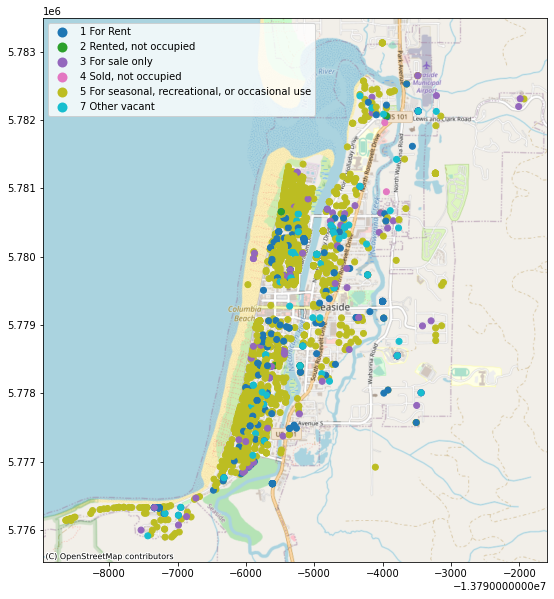

In [51]:
# visualize population
gdf = hua_gdf
map = viz.plot_gdf_map(gdf,column='Vacancy Type', category=True)
map

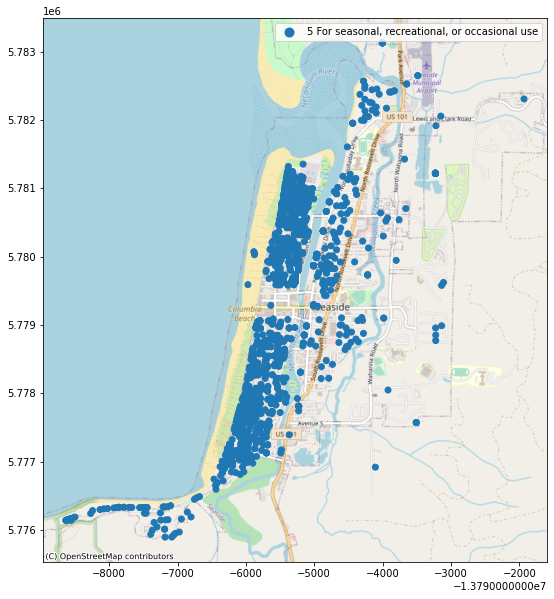

In [58]:
# visualize population by race and tenure status
seasonalrentals_gdf = hua_gdf.loc[(hua_gdf['Vacancy Type'] =='5 For seasonal, recreational, or occasional use')]
map = viz.plot_gdf_map(seasonalrentals_gdf,column='Vacancy Type')
map

In [53]:
# What location should the map be centered on?
center_x = hua_gdf.bounds.minx.mean()
center_y = hua_gdf.bounds.miny.mean()
center_x, center_y

(-123.92208882309136, 45.993245623631466)

In [54]:
# https://ipyleaflet.readthedocs.io/en/latest/api_reference/heatmap.html
import ipyleaflet as ipylft
from ipyleaflet import Map, Heatmap

In [55]:
print("ipyleaflet Version ",ipylft.__version__)

ipyleaflet Version  0.13.6


In [59]:
hudata = seasonalrentals_gdf[['y','x','vacancy']].values.tolist()

In [61]:
from ipyleaflet import Map, Heatmap, LayersControl

map = Map(center=[center_y,center_x], zoom=13)

minority_renters_gdf = Heatmap(
    locations = hudata,
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'yellow', 0.5: 'orange', 1.0: 'red'},
    name = 'Seasonal Rentals',
)

map.add_layer(minority_renters_gdf);
control = LayersControl(position='topright')
map.add_control(control)
map

Map(center=[45.993245623631466, -123.92208882309136], controls=(ZoomControl(options=['position', 'zoom_in_text…